# This is a summary of a walk time analysis

In principle we are looking at the time difference between a laser sync pulse in a SiPM and the same laser pulse in the PMT1 of local monitor. The former is affected by the filter wheel setting while the latter is not.

## 1. Basic setup

In [1]:
import ROOT
file1 = ROOT.TFile("gm2slac_timeWalk_run02133.root")
file2 = ROOT.TFile("gm2slac_timeWalk_run02134.root")
file3 = ROOT.TFile("gm2slac_timeWalk_run02135.root")
file4 = ROOT.TFile("gm2slac_timeWalk_run02136.root")
file5 = ROOT.TFile("gm2slac_timeWalk_run02137.root")
file6 = ROOT.TFile("gm2slac_timeWalk_run02138.root")
file7 = ROOT.TFile("gm2slac_timeWalk_run02139.root")

Welcome to JupyROOT 6.08/04


## 2. Sync pulse time extraction from LM PMT1

There are two easy ways of doing this:

* time of the peak sample (starting from below, *_dt2_*)

* time from the parabolic fit of the (peak-1), peak and (peak+1) samples (starting from below, *_dt1_*)

In [2]:
fw1_dt1 = file1.Get("timeWalkAnalyzer/dt1")
fw2_dt1 = file2.Get("timeWalkAnalyzer/dt1")
fw3_dt1 = file3.Get("timeWalkAnalyzer/dt1")
fw4_dt1 = file4.Get("timeWalkAnalyzer/dt1")
fw5_dt1 = file5.Get("timeWalkAnalyzer/dt1")
fw6_dt1 = file6.Get("timeWalkAnalyzer/dt1")
fw7_dt1 = file7.Get("timeWalkAnalyzer/dt1")
fw1_dt2 = file1.Get("timeWalkAnalyzer/dt2")
fw2_dt2 = file2.Get("timeWalkAnalyzer/dt2")
fw3_dt2 = file3.Get("timeWalkAnalyzer/dt2")
fw4_dt2 = file4.Get("timeWalkAnalyzer/dt2")
fw5_dt2 = file5.Get("timeWalkAnalyzer/dt2")
fw6_dt2 = file6.Get("timeWalkAnalyzer/dt2")
fw7_dt2 = file7.Get("timeWalkAnalyzer/dt2")

## 3. Comparison between two methods

Here I am trying to show the difference between the two methods. I expect the parabolic time to be more precise.

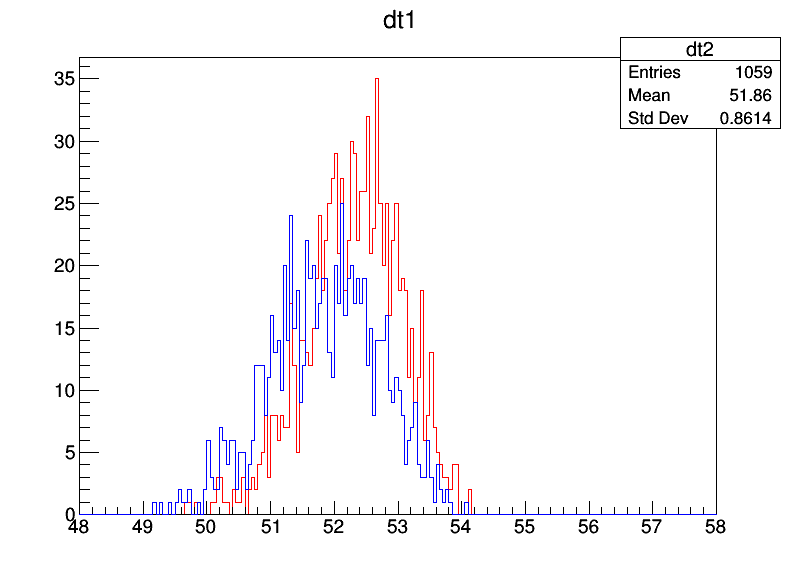

In [3]:
%jsroot off
c1 = ROOT.TCanvas("c1","c1",800,600)
fw1_dt1.SetLineColor(2)
fw1_dt2.SetLineColor(4)
fw1_dt1.Draw()
fw1_dt2.Draw("sames")
c1.Draw()

You can see that dt1(blue) is narrower that the dt2 (red), which is expected.

## 4. Comparison from filterwheel 1 to filterwheel 7

Here the main purpose is to see if there is any time walk when the pulse amplitude changes.

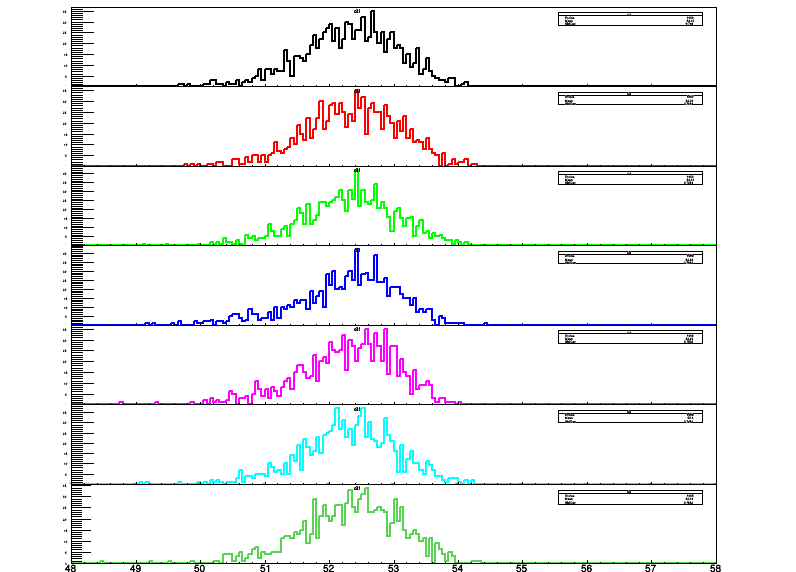

In [4]:
%jsroot off
c2 = ROOT.TCanvas("c2","c2",800,600)
c2.Divide(1,7,0,0)
fw1_dt1.SetLineColor(1)
fw2_dt1.SetLineColor(2)
fw3_dt1.SetLineColor(3)
fw4_dt1.SetLineColor(4)
fw5_dt1.SetLineColor(6)
fw6_dt1.SetLineColor(7)
fw7_dt1.SetLineColor(8)

fw1_dt1.SetLineWidth(2)
fw2_dt1.SetLineWidth(2)
fw3_dt1.SetLineWidth(2)
fw4_dt1.SetLineWidth(2)
fw5_dt1.SetLineWidth(2)
fw6_dt1.SetLineWidth(2)
fw7_dt1.SetLineWidth(2)

c2.cd(1)
fw1_dt1.Draw()
c2.cd(2)
fw2_dt1.Draw()
c2.cd(3)
fw3_dt1.Draw()
c2.cd(4)
fw4_dt1.Draw()
c2.cd(5)
fw5_dt1.Draw()
c2.cd(6)
fw6_dt1.Draw()
c2.cd(7)
fw7_dt1.GetXaxis().SetLabelSize(0.12)
fw7_dt1.Draw()

c2.Draw()

Here, the filterwheel setting is from 1 to 7 as we go from top to bottom. We can also look at FW1 and FW7 overlaid:

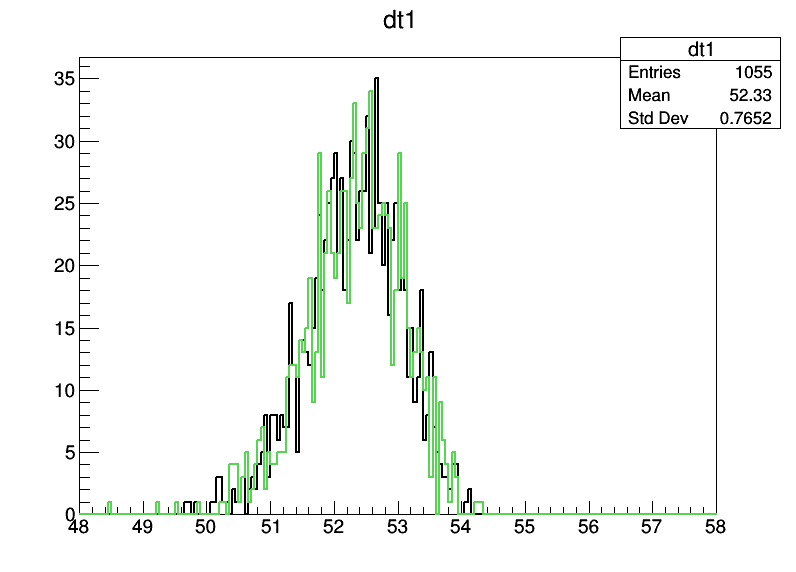

In [5]:
c3 = ROOT.TCanvas("c3","c3",800,600)
fw1_dt1.Draw()
fw7_dt1.Draw("same")
c3.Draw()

In princple we do not see any significant time walk from FW1 to FW7.

## 5. Energy versus dt1

Another way of looking at the data is to plot energy versus dt1 for all the filterwheel settings.

In [6]:
fw1_edt1 = file1.Get("timeWalkAnalyzer/edt1")
fw2_edt1 = file2.Get("timeWalkAnalyzer/edt1")
fw3_edt1 = file3.Get("timeWalkAnalyzer/edt1")
fw4_edt1 = file4.Get("timeWalkAnalyzer/edt1")
fw5_edt1 = file5.Get("timeWalkAnalyzer/edt1")
fw6_edt1 = file6.Get("timeWalkAnalyzer/edt1")
fw7_edt1 = file7.Get("timeWalkAnalyzer/edt1")
fw1_edt1.Add(fw2_edt1)
fw1_edt1.Add(fw3_edt1)
fw1_edt1.Add(fw4_edt1)
fw1_edt1.Add(fw5_edt1)
fw1_edt1.Add(fw6_edt1)
fw1_edt1.Add(fw7_edt1)

True

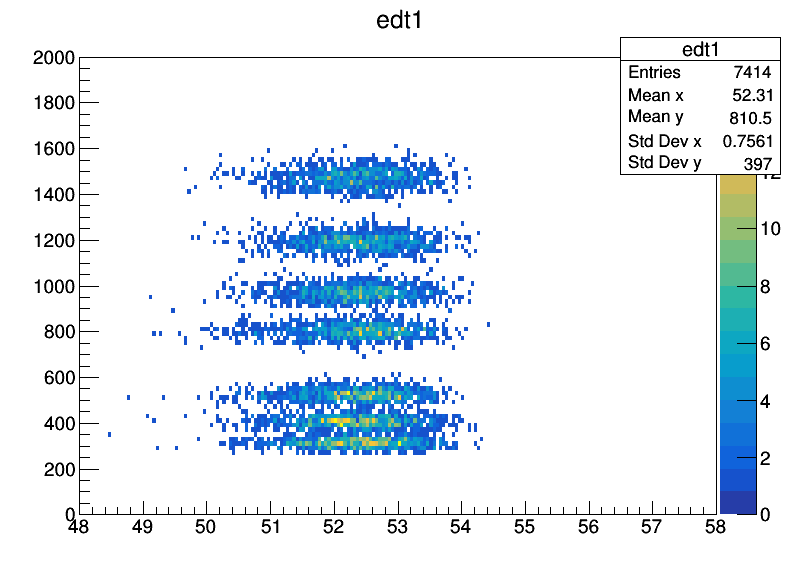

In [7]:
c4 = ROOT.TCanvas("c4","c4",800,600)
fw1_edt1.Draw("colz")
c4.Draw()